
In the London Case study, we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
properties = pd.read_excel(url_LondonHousePrices, sheet_name = 'Average price',index_col = None)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 49 columns):
Unnamed: 0              305 non-null datetime64[ns]
City of London          306 non-null object
Barking & Dagenham      306 non-null object
Barnet                  306 non-null object
Bexley                  306 non-null object
Brent                   306 non-null object
Bromley                 306 non-null object
Camden                  306 non-null object
Croydon                 306 non-null object
Ealing                  306 non-null object
Enfield                 306 non-null object
Greenwich               306 non-null object
Hackney                 306 non-null object
Hammersmith & Fulham    306 non-null object
Haringey                306 non-null object
Harrow                  306 non-null object
Havering                306 non-null object
Hillingdon              306 non-null object
Hounslow                306 non-null object
Islington               306 non-null object
Kensing

In [5]:
properties.shape

(306, 49)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [6]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [7]:
prop_trans = properties.T #transposing my dataframe
prop_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [8]:
prop_trans.index #these are my current indices

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [9]:
prop_trans = prop_trans.reset_index() # why is it that when i do inplace=True, it gives me nonetype?

In [10]:
prop_trans.head()

,index,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [11]:
prop_trans.index

RangeIndex(start=0, stop=49, step=1)

In [12]:
prop_trans.columns = prop_trans.iloc[0]
prop_trans.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [13]:
prop_trans.drop(prop_trans.index[0],inplace=True)
prop_trans.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [14]:
prop_trans.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00,
       2019-11-01 00:00:00, 2019-12-01 00:00:00, 2020-01-01 00:00:00,
       2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00,
       2020-05-01 00:00:00],
      dtype='object', name=0, length=307)

In [15]:
prop_trans.rename(columns = {'Unnamed: 0':'London Boroughs', pd.NaT:'Code'},inplace=True)
prop_trans.head()

,London Boroughs,Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [16]:
#to analyze the data easily, we need to reshape the data.
#melt is used to transform wide data to long data
#we have so many columns, so to make the data tidy we should have fewer columns. Hence, we use melt.

prop_melted = pd.melt(prop_trans, id_vars = ["London Boroughs", "Code"], var_name = "Dates", value_name= "Average Prices")
prop_melted.head()

,London Boroughs,Code,Dates,Average Prices
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [17]:
prop_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
London Boroughs    14640 non-null object
Code               13725 non-null object
Dates              14640 non-null datetime64[ns]
Average Prices     13725 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 457.6+ KB


In [18]:
prop_melted.dtypes

London Boroughs            object
Code                       object
Dates              datetime64[ns]
Average Prices             object
dtype: object

In [19]:
prop_melted['Average Prices'] = pd.to_numeric(prop_melted['Average Prices'])
prop_melted.dtypes

London Boroughs            object
Code                       object
Dates              datetime64[ns]
Average Prices            float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [20]:
prop_melted.count() #not the same number of observations which means something isn't right

London Boroughs    14640
Code               13725
Dates              14640
Average Prices     13725
dtype: int64

In [21]:
prop_melted.isnull().sum() #915 values in Avg prices and Code are NaN, while there are 0 null values in the LB col

London Boroughs      0
Code               915
Dates                0
Average Prices     915
dtype: int64

In [22]:
prop_melted['London Boroughs'].unique()
#however here we can see that there are some columns like Unnamed 37, EAST MIDLANDS etc

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [23]:
prop_melted[prop_melted['London Boroughs'] == 'Unnamed: 34'].head() #all nan values

,London Boroughs,Code,Dates,Average Prices
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [24]:
prop_melted[prop_melted['London Boroughs'] == 'Unnamed: 47'].head() # all nan values, so can delete

,London Boroughs,Code,Dates,Average Prices
46,Unnamed: 47,NaN,1995-01-01,NaN
94,Unnamed: 47,NaN,1995-02-01,NaN
142,Unnamed: 47,NaN,1995-03-01,NaN
190,Unnamed: 47,NaN,1995-04-01,NaN
238,Unnamed: 47,NaN,1995-05-01,NaN


In [25]:
dropped = prop_melted.dropna()
dropped.head(50)

,London Boroughs,Code,Dates,Average Prices
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [26]:
dropped.count() #cleared up all nan values

London Boroughs    13725
Code               13725
Dates              13725
Average Prices     13725
dtype: int64

In [27]:
dropped['London Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [28]:
dont_want = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [29]:
#creating filters of bool series from is in by saying we don't want what's in dont_want
new_df = dropped[~dropped['London Boroughs'].isin(dont_want)]
new_df.head(50)

,London Boroughs,Code,Dates,Average Prices
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [30]:
new_df.dtypes

London Boroughs            object
Code                       object
Dates              datetime64[ns]
Average Prices            float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [31]:
city_of_lon = new_df[new_df['London Boroughs'] == 'City of London']
city_of_lon.head()

,London Boroughs,Code,Dates,Average Prices
0,City of London,E09000001,1995-01-01,91448.98487
48,City of London,E09000001,1995-02-01,82202.77314
96,City of London,E09000001,1995-03-01,79120.70256
144,City of London,E09000001,1995-04-01,77101.20804
192,City of London,E09000001,1995-05-01,84409.14932


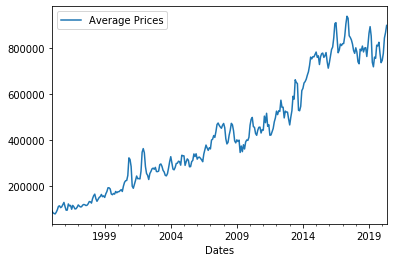

In [32]:
city_of_lon.plot(kind='line', x= 'Dates',y='Average Prices')
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [33]:
new_df['Year'] = new_df['Dates'].apply(lambda t: t.year)
new_df.head(20)

C:\Users\Rajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,London Boroughs,Code,Dates,Average Prices,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
5,Bromley,E09000006,1995-01-01,81671.47692,1995
6,Camden,E09000007,1995-01-01,120932.88810,1995
7,Croydon,E09000008,1995-01-01,69158.16225,1995
8,Ealing,E09000009,1995-01-01,79885.89069,1995
9,Enfield,E09000010,1995-01-01,72514.69096,1995


In [34]:
group_df = new_df.groupby(['London Boroughs','Year'],as_index=False)['Average Prices'].mean()
group_df.head()

,London Boroughs,Year,Average Prices
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [40]:
group_df.tail(20)

,London Boroughs,Year,Average Prices
838,Westminster,2001,2.961055e+05
839,Westminster,2002,3.396224e+05
840,Westminster,2003,3.634660e+05
841,Westminster,2004,3.793954e+05
842,Westminster,2005,3.993850e+05
843,Westminster,2006,4.368649e+05
844,Westminster,2007,5.144267e+05
845,Westminster,2008,5.401966e+05
846,Westminster,2009,5.320970e+05
847,Westminster,2010,6.066982e+05


In [35]:
dfg = new_df.groupby(by=['London Boroughs','Year']).mean()
dfg.head()

Average Prices
London Boroughs    Year                
Barking & Dagenham 1995    51817.969390
                   1996    51718.192690
                   1997    55974.262309
                   1998    60285.821083
                   1999    65320.934441

In [38]:
dfg = dfg.reset_index()
dfg.head()

,London Boroughs,Year,Average Prices
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [39]:
dfg.shape

(858, 3)

In [41]:
dfg.tail(20)

,London Boroughs,Year,Average Prices
838,Westminster,2001,2.961055e+05
839,Westminster,2002,3.396224e+05
840,Westminster,2003,3.634660e+05
841,Westminster,2004,3.793954e+05
842,Westminster,2005,3.993850e+05
843,Westminster,2006,4.368649e+05
844,Westminster,2007,5.144267e+05
845,Westminster,2008,5.401966e+05
846,Westminster,2009,5.320970e+05
847,Westminster,2010,6.066982e+05


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [43]:
def price_ratio(borough):
    y1998 = float(borough['Average Prices'][borough['Year'] == 1998])
    y2018 = float(borough['Average Prices'][borough['Year'] == 2018])
    ratio = [y2018/y1998]
    return ratio

In [55]:
#trying it out for one borough
price_ratio(group_df[group_df['London Boroughs']=='Westminster'])

5.353565392605413

In [58]:
#storing our price ratio for each london borough
final = {}

In [59]:
for bor in group_df['London Boroughs'].unique():
    b = group_df[group_df['London Boroughs'] == bor]
    final[bor] = price_ratio(b)
print(final)

{'Barking & Dagenham': 4.89661861291754, 'Barnet': 4.358195917538044, 'Bexley': 4.248977046127877, 'Brent': 4.8945544971392865, 'Bromley': 4.0947846853338765, 'Camden': 4.935353408884261, 'City of London': 5.301620377587609, 'Croydon': 4.201100280024767, 'Ealing': 4.311450902121834, 'Enfield': 4.26347158349581, 'Greenwich': 4.763036347329193, 'Hackney': 6.198285561008662, 'Hammersmith & Fulham': 4.137798101936229, 'Haringey': 5.134624964136042, 'Harrow': 4.0591964329643195, 'Havering': 4.325230371335308, 'Hillingdon': 4.2002730803844575, 'Hounslow': 3.976409106143329, 'Islington': 4.844048012802298, 'Kensington & Chelsea': 5.082465066092464, 'Kingston upon Thames': 4.270549521484271, 'Lambeth': 4.957751163514063, 'Lewisham': 5.449221041059685, 'Merton': 4.741273313294604, 'Newham': 5.305390437201879, 'Redbridge': 4.471182006097364, 'Richmond upon Thames': 4.005161895721457, 'Southwark': 5.516485302379376, 'Sutton': 4.118522608573157, 'Tower Hamlets': 4.62670104006116, 'Waltham Forest':

In [68]:
df_ratios = pd.Series(final).to_frame()
df_ratios.head()

df1 = pd.DataFrame(df_ratios)
df1.head()

,0
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785


In [72]:
df1.head()

,0
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785


In [73]:
df1.columns

RangeIndex(start=0, stop=1, step=1)

In [81]:
df1.rename(columns={'index':'Boroughs',0:'Ratios'},inplace=True)
df1.head()

,Ratios
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785


In [88]:
df1 = df1.reset_index()
df1.head()

,index,Ratios
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [91]:

df1.rename(columns={'index':'Boroughs'},inplace=True)
df1.head()

,Boroughs,Ratios
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [92]:
top10 = df1.sort_values(by='Ratios',ascending=False).head(10)
print(top10)

                Boroughs    Ratios
11               Hackney  6.198286
30        Waltham Forest  5.834756
27             Southwark  5.516485
22              Lewisham  5.449221
32           Westminster  5.353565
24                Newham  5.305390
6         City of London  5.301620
13              Haringey  5.134625
19  Kensington & Chelsea  5.082465
21               Lambeth  4.957751


[Text(0, 0, 'Hackney'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Kensington & Chelsea'),
 Text(0, 0, 'Lambeth')]

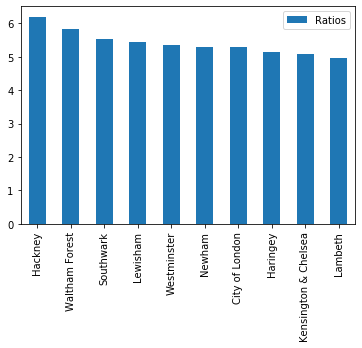

In [95]:
ax = top10[['Boroughs','Ratios']].plot(kind='bar')

ax.set_xticklabels(top10.Boroughs)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 